In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
X1: np.ndarray = np.load("./data/X/seis2_1_0.npy")
X1 = np.transpose(X1, (0, 2, 3, 1))
y1: np.ndarray = np.load("./data/y/vel2_1_0.npy")
y1 = np.transpose(y1, (0, 2, 3, 1))
# X1_reshaped = X1.reshape(X1.shape[0], -1)
# y1_reshaped = y1.reshape(y1.shape[0], -1)

X1.shape, y1.shape, # X1_reshaped.shape, y1_reshaped.shape

((500, 5, 1000, 70), (500, 1, 70, 70))

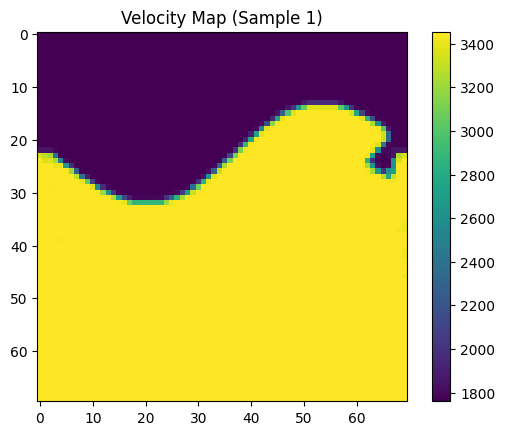

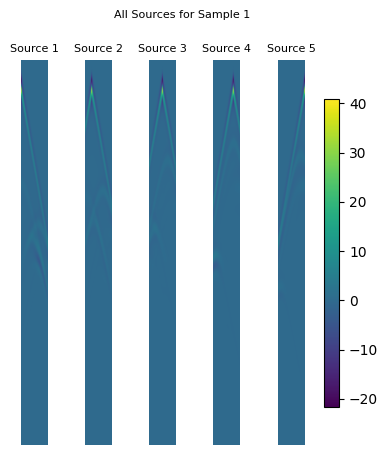

In [10]:
plt.imshow(y1[0, :, :, 0], cmap='viridis')
plt.colorbar()
plt.title("Velocity Map (Sample 1)")
plt.show()

sample_index = 0  # Index of the sample to visualize
time_step = 0     # Choose a specific time step if needed (e.g., 0)

fig, axes = plt.subplots(1, 5, figsize=(5, 5))  # Create a 1x5 grid of subplots

for source in range(5):  # Loop through all 5 sources
    ax = axes[source]
    ax.imshow(X1[sample_index, :, :, source], cmap='viridis')  # Plot each source
    ax.set_title(f"Source {source + 1}", fontsize=8)
    ax.axis('off')  # Turn off axis labels for cleaner visualization

plt.suptitle(f"All Sources for Sample {sample_index + 1}", fontsize=8)
plt.colorbar(axes[0].images[0], ax=axes, location='right', shrink=0.8)  # Add a shared colorbar
plt.show()

In [ ]:
model = tf.keras.Sequential([
	tf.keras.layers.InputLayer(shape=[5, 1000, 70]),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dropout(rate=0.2),
	tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding="same", activation="relu")
])